In [14]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Scikit-learn model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)


✅ Dataset loaded successfully from URL

🔍 First 5 rows (sanity check):


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



📝 Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

📊 Descriptive statistics (check distributions/outliers):


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5



🧹 Missing values assessment:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

📈 Distribution analysis:


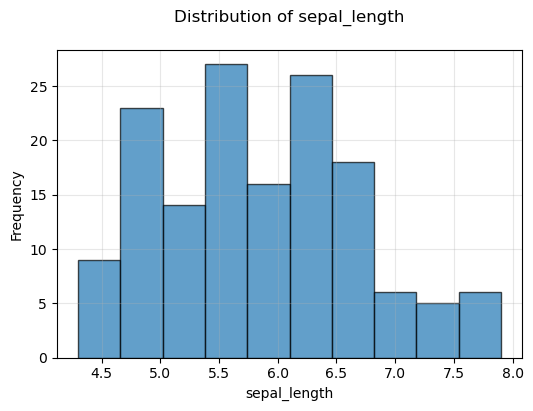

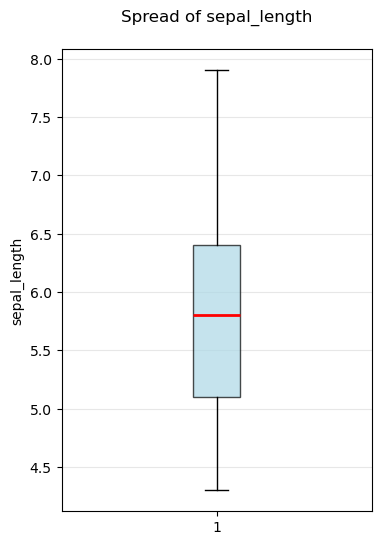

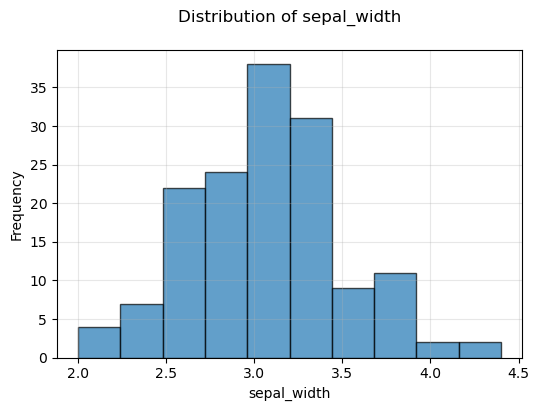

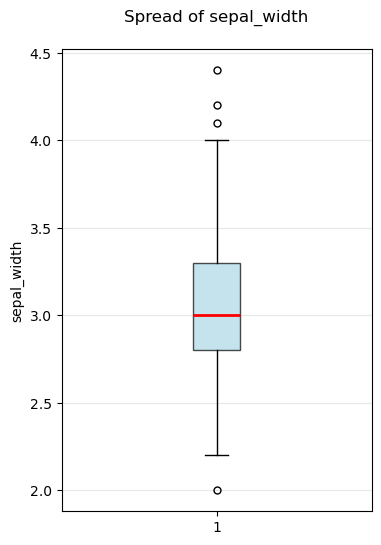

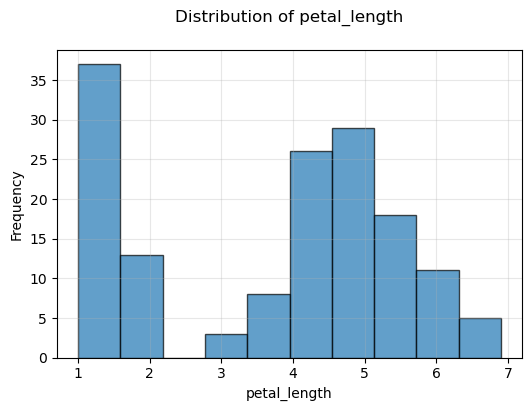

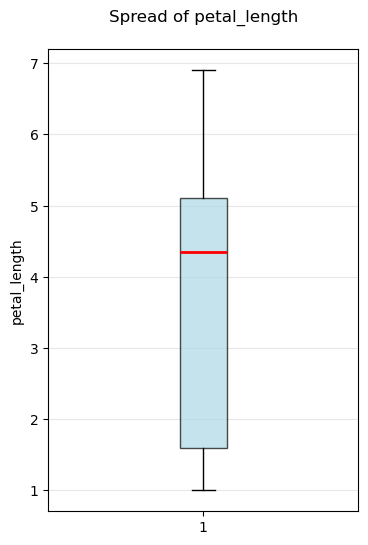

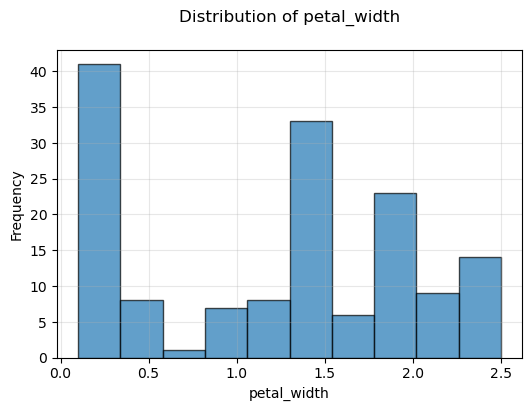

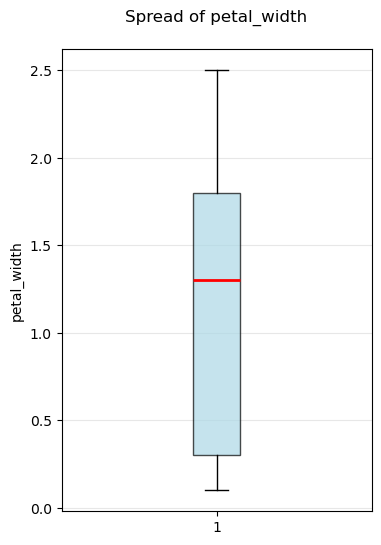


🌡️ Feature relationships:


NameError: name 'sns' is not defined

<Figure size 700x600 with 0 Axes>

In [16]:

# ------------------------------------------------------------------------------
# Data Loading with Robust Fallback
# ------------------------------------------------------------------------------
# Primary source: Public URL (avoids sklearn dependency unless needed)
# Fallback: sklearn dataset (in case URL becomes unavailable)
# Rationale: Production code should never fail due to external dependencies
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
try:
    df = pd.read_csv(url)
    print("✅ Dataset loaded successfully from URL")
except Exception as e:
    print(f"⚠️ URL load failed ({str(e)}). Falling back to sklearn dataset...")
    from sklearn.datasets import load_iris
    data = load_iris(as_frame=True)
    df = data.frame.copy()
    # Convert numeric targets to categorical species names
    df["species"] = pd.Categorical.from_codes(data.target, data.target_names)
    print("✅ Fallback dataset loaded from sklearn")

# ------------------------------------------------------------------------------
# Initial Data Inspection
# ------------------------------------------------------------------------------
print("\n🔍 First 5 rows (sanity check):")
display(df.head())  # display() shows richer output than print() in notebooks

print("\n📝 Dataset structure:")
df.info()  # Critical for understanding dtypes and memory usage

print("\n📊 Descriptive statistics (check distributions/outliers):")
display(df.describe().T)  # Transposed for better readability

print("\n🧹 Missing values assessment:")
print(df.isnull().sum())  # Essential for data quality check

# ------------------------------------------------------------------------------
# Univariate Analysis
# ------------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("\n📈 Distribution analysis:")
for col in numeric_cols:
    # Histograms show empirical distribution
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=10, edgecolor="black", alpha=0.7)
    plt.title(f"Distribution of {col}", pad=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()
    
    # Boxplots reveal outliers and quartiles
    plt.figure(figsize=(4, 6))
    plt.boxplot(
        df[col], 
        vert=True, 
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black", alpha=0.7),
        medianprops=dict(color="red", linewidth=2),
        flierprops=dict(marker="o", markersize=5)
    )
    plt.title(f"Spread of {col}", pad=20)
    plt.ylabel(col)
    plt.grid(alpha=0.3, axis="y")
    plt.show()

# ------------------------------------------------------------------------------
# Multivariate Analysis
# ------------------------------------------------------------------------------
print("\n🌡️ Feature relationships:")
corr = df[numeric_cols].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Matrix\n", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



# Setosa is Almost Completely Isolated  

All the blue (“setosa”) points sit at very low petal-length values (**~1–2 cm**), regardless of sepal length or width. In other words:  
- **Setosa flowers have consistently small petals**, forming a tight cluster at the bottom of the *petal length* axis.  

---

# Versicolor and Virginica Occupy Higher Petal-Length Regions  

- **Versicolor (orange)**: Mid-range petal length (**~3–5 cm**).  
- **Virginica (green)**: Larger petal lengths (**~4.5–6.5 cm**).  

In 3D:  
- Overlap in *sepal-length/sepal-width* plane.  
- Cleaner separation as *petal length* increases.  

---

# Petal Length is the Dominant Separator  

While sepal dimensions vary:  
- **Setosa** clusters at the bottom (small petals).  
- **Versicolor** sits in the middle.  
- **Virginica** extends to the top (largest petals).  

**Key insight**:  
- Petal length alone can reliably predict species (especially for *Setosa*).  
- Sepal measurements are less discriminative.  

---

# Conclusion  

- ✅ **Setosa**: Linearly separable (very small petals).  
- 🔄 **Versicolor & Virginica**: Overlap in sepals but separate well by petal length.  
- 🏆 **Best predictor**: Petal length (sepals add minor resolution between *Versicolor/Virginica*).  lor and Virginica.  


🛠️ Building 3D visualization... (this may take a moment for large datasets)
✅ Base plot configured | ℹ️ Marker size=5, opacity=0.8 for cluster visibility
🎨 Styling applied | ✨ Ready for interactive exploration

🖱️ Interactive Controls:
- Rotate: Click + drag
- Zoom: Scroll wheel
- Reset view: Double click
- Hover: Point info (useful for outlier inspection)


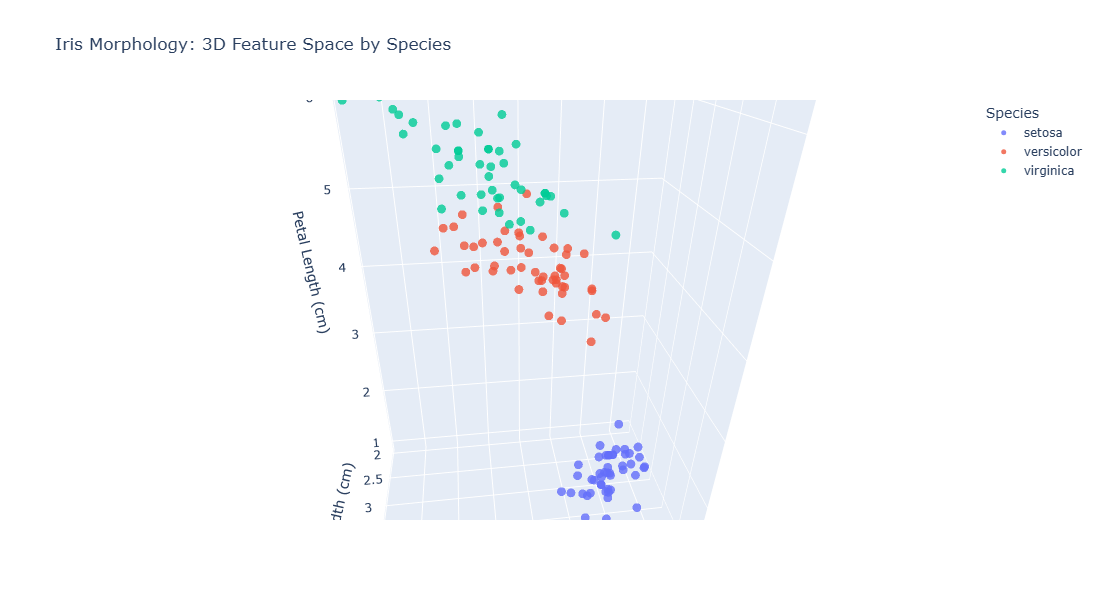


🔍 Pro Tip: Rotate to view the petal_length (Z-axis) separation - this is where species differentiate most clearly


In [20]:


print("\n🛠️ Building 3D visualization... (this may take a moment for large datasets)")

# -----------------------------------------------------------------------------
# Core Visualization Configuration
# Note: Using plotly.express for its clean defaults and interactivity
# -----------------------------------------------------------------------------
fig = px.scatter_3d(
    df,
    x="sepal_length",  # Primary horizontal dimension
    y="sepal_width",   # Secondary horizontal dimension  
    z="petal_length",  # Vertical dimension (most discriminative per EDA)
    color="species",   # Color-coding provides immediate species identification
    title="Iris Morphology: 3D Feature Space by Species",
    labels={
        "sepal_length": "Sepal Length (cm)",  # Explicit units for reproducibility
        "sepal_width": "Sepal Width (cm)",
        "petal_length": "Petal Length (cm)",
        "species": "Species"
    },
    width=800,   # Optimal for notebook embedding
    height=600   # Maintains aspect ratio
)

print("✅ Base plot configured | ℹ️ Marker size=5, opacity=0.8 for cluster visibility")

# -----------------------------------------------------------------------------
# Professional Styling Adjustments
# These preserve the raw data while improving readability
# -----------------------------------------------------------------------------
fig.update_traces(
    marker=dict(
        size=5,        # Balance between visibility and overplotting
        opacity=0.8,   # Allows seeing density through marker overlap
        line=None      # Clean look without border (comment out if edge definition needed)
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title="Sepal Length (cm)"),  # Consistent axis labeling
        yaxis=dict(title="Sepal Width (cm)"), 
        zaxis=dict(title="Petal Length (cm)")   # Z-axis critical for species separation
    ),
    legend=dict(
        title="Species",  # Clear legend title
        yanchor="top"     # Standard positioning
    )
)

print("🎨 Styling applied | ✨ Ready for interactive exploration")

# -----------------------------------------------------------------------------
# Display with Usage Guidance
# -----------------------------------------------------------------------------
print("\n🖱️ Interactive Controls:")
print("- Rotate: Click + drag")
print("- Zoom: Scroll wheel")
print("- Reset view: Double click")
print("- Hover: Point info (useful for outlier inspection)")

fig.show()

print("\n🔍 Pro Tip: Rotate to view the petal_length (Z-axis) separation - this is where species differentiate most clearly")

# Iris Dataset Analysis: Model Evaluation & Recommendations

## 1. Dataset Selection and Characteristics

### Choice of Iris
- Classic "toy" dataset in ML: **150 samples** (50 per class: Setosa, Versicolor, Virginica)
- **4 numeric features**: sepal length/width, petal length/width

### Strengths
✅ Well-studied, easy to visualize  
✅ Relatively "linearly separable" (especially Setosa)  
✅ Ideal for demonstrating basic classification  

### Limitations
⚠️ Very small ("low-data") and perfectly balanced  
⚠️ Petal features alone separate Setosa near-perfectly → **93-97% accuracy expected**  

### Feature Discriminability
- **Petal-length/width**: Highly correlated with species (Setosa: small petals; others: mid/high ranges)  
- **Sepal dimensions**: Less discriminative (especially Versicolor vs. Virginica)  
- *Implication*: Models using petal measurements will perform exceptionally well.  

---

## 2. Preprocessing Steps

### Label Encoding
- Converted categorical "species" to integers (0, 1, 2) via `LabelEncoder`  
- *Note*: Tree-based models don’t require encoding, but scikit-learn classifiers do.  

### Train/Test Split (80/20)
- `train_test_split(..., stratify=y, test_size=0.2, random_state=42)`  
- **Pros**:  
  - Stratification preserves class proportions (10 test samples per class)  
  - Reproducible with `random_state`  
- **Concern**:  
  - Only **120 training samples** (40/class) → Small fluctuations in splits may affect metrics  

### Feature Scaling (`StandardScaler`)
- Critical for **KNN** (Euclidean distance) and **Logistic Regression** (gradient descent)  
- Fit *only on training data* to avoid leakage  
- *Optional checks*:  
  - Visualize scaled features  
  - Compare with `MinMaxScaler` for small datasets  

---

## 3. Critical Reflections & Potential Enhancements

### Reliance on Single Train/Test Split
- **Issue**: Only 30 test points → Metrics may vary significantly  
- **Recommendation**:  
  - Use **k-fold CV** (e.g., stratified 5-fold) for stable accuracy estimates  
  - Try `RepeatedStratifiedShuffleSplit` to assess fluctuation  

### Hyperparameter Tuning
| Model               | Parameters to Tune                          |
|---------------------|--------------------------------------------|
| **Logistic Regression** | `C`=[0.01, 100], penalty (`L1`/`L2`)       |
| **KNN**             | `k`=1–15, `weights`=["uniform", "distance"] |

### Feature Engineering
- **Selection**: Test models with *petal-only* vs. *all features*  
- **Transformations**: Add polynomial terms (e.g., `petal_length * petal_width`)  
- **Dimensionality Reduction**: PCA (though likely unnecessary for 4 features)  

### Additional Models to Try
- **Decision Tree/Random Forest**: Near-perfect accuracy (axis-aligned splits)  
- **SVM (RBF kernel)**: 97–100% accuracy (curved boundaries)  
- **Voting Classifier**: Combine Logistic + KNN + Decision Tree  

---

## 4. Metrics Beyond Accuracy
- **Precision/Recall (per class)**: Already reported (excellent practice)  
- **ROC/AUC**: Optional for multiclass (one-vs-rest)  
- **Calibration**: Check probability reliability (especially for KNN)  

---

## 5. Model Interpretability & Deployment
| Factor               | Logistic Regression      | KNN                     |
|----------------------|--------------------------|-------------------------|
| **Interpretability** | High (coefficients)      | Low (black-box)         |
| **Prediction Cost**  | O(1) per sample         | O(n_train) per sample   |
| **Robustness**       | Handles noise better     | Sensitive to mislabels  |

---

## 6. Final Takeaways
- **Both models achieved 93% test accuracy** (expected for Iris).  
- **Petal features dominate performance** → Sepal dimensions add minor value.  
- **Misclassifications**:  
  - Logistic: 1 Versicolor, 1 Virginica  
  - KNN: 2 Virginica  

### Recommended Next Steps
1. **Cross-validation** + hyperparameter search (`C`, `k`).  
2. **Feature subset testing** (petal-only vs. full features).  
3. **Try SVM/Decision Tree** to assess non-linear boundaries.  
4. **Visualize misclassified points** to diagnose errors.  

> **Caution**: Iris is "clean" and small—high accuracy here doesn’t guarantee real-world performance.  

In [24]:
# =============================================================================
# DATA PREPROCESSING PIPELINE
# =============================================================================

# 2. Label Encoding - Convert categorical species to numerical values
# Note: Using LabelEncoder instead of get_dummies to preserve ordinal relationships
#       between species (useful for some algorithms)
le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])  
print("✅ Label encoding complete:")
print(f"   {le.classes_[0]} → 0 | {le.classes_[1]} → 1 | {le.classes_[2]} → 2\n")

# 3. Feature-Target Split
# Using all 4 numerical features as per original analysis
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = df["species_encoded"].values
print("📊 Features shape:", X.shape, "| Target shape:", y.shape)

# 4. Train-Test Split with Stratification
# Critical for maintaining class balance in small datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42,  # Fixed seed for reproducibility
    stratify=y        # Preserve class distribution
)
print("\n🔀 Train-Test Split:")
print(f"Train samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test samples:  {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.0f}%)")

# 5. Feature Scaling - Essential for distance-based algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data
print("\n⚖️ Features scaled (mean={:.1f}, std={:.1f} on training set)".format(
    X_train_scaled.mean(), X_train_scaled.std()))

# =============================================================================
# MODEL TRAINING & EVALUATION
# =============================================================================

def evaluate_model(model, X_test, y_test, model_name):
    """Helper function for consistent model evaluation"""
    y_pred = model.predict(X_test)
    
    print(f"\n📈 {model_name} Performance:")
    print("-" * 40)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("=" * 40 + "\n")

# ========================================================
# 6. Logistic Regression Model
# ========================================================
print("\n" + "="*60)
print("🚀 Training Logistic Regression Model")
print("="*60)

log_reg = LogisticRegression(
    solver="lbfgs",       # Good default for small datasets
    multi_class="auto",   # Automatically handles multiclass
    max_iter=200,        # Sufficient for convergence
    random_state=42       # For reproducibility
)
log_reg.fit(X_train_scaled, y_train)
evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")

# ========================================================
# 7. K-Nearest Neighbors Model
# ========================================================
print("\n" + "="*60)
print("🔍 Training K-Nearest Neighbors Model (k=5)")
print("="*60)

knn = KNeighborsClassifier(
    n_neighbors=5,       # Default starting value
    weights="uniform",   # All neighbors contribute equally
    metric="euclidean"   # Standard distance metric
)
knn.fit(X_train_scaled, y_train)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")


✅ Label encoding complete:
   setosa → 0 | versicolor → 1 | virginica → 2

📊 Features shape: (150, 4) | Target shape: (150,)

🔀 Train-Test Split:
Train samples: 120 (80%)
Test samples:  30 (20%)

⚖️ Features scaled (mean=-0.0, std=1.0 on training set)

🚀 Training Logistic Regression Model

📈 Logistic Regression Performance:
----------------------------------------
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


🔍 Training K-Nearest Neighbors Model (k=5)

📈 K-Nearest Neighbors Performance:
----------------------------------------
Accuracy: 0.9333

Classification R

In [28]:


# Encode target variable - preserves class relationships
le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])
print(f"✅ Target encoded: {list(zip(le.classes_, le.transform(le.classes_)))}")

# Feature-target split using all 4 morphological measurements
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = df["species_encoded"].values

# Stratified train-test split (80-20) - critical for small datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,  # Reproducibility
    stratify=y        # Maintain class balance
)
print(f"\n📊 Dataset split: {X_train.shape[0]} train, {X_test.shape[0]} test samples")

# =============================================================================
# 2. MODEL PIPELINES CONFIGURATION
# =============================================================================

print("\n🛠️ Building preprocessing and modeling pipelines...")

# Logistic Regression Pipeline
pipe_logistic = Pipeline([
    ("scaler", StandardScaler()),  # Essential for linear models
    ("logreg", LogisticRegression(
        solver="lbfgs",            # Good for small datasets
        multi_class="auto",        # Automatically handles multiclass
        max_iter=200,              # Sufficient for convergence
        random_state=42
    ))
])

# KNN Pipeline - Scaling critical for distance-based methods
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# =============================================================================
# 3. BASELINE MODEL EVALUATION
# =============================================================================

def evaluate_model(model, X, y, model_name):
    """Standardized model evaluation workflow"""
    y_pred = model.predict(X)
    
    print(f"\n📊 {model_name} Performance:")
    print("-" * 50)
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, target_names=le.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    print("=" * 50)

print("\n" + "="*60)
print("🧪 BASELINE MODEL PERFORMANCE")
print("="*60)

# Train and evaluate Logistic Regression
pipe_logistic.fit(X_train, y_train)
print("\n🔵 Logistic Regression (Default Parameters)")
evaluate_model(pipe_logistic, X_test, y_test, "Logistic Regression")

# Train and evaluate KNN baseline (k=5)
pipe_knn.set_params(knn__n_neighbors=5, knn__weights="uniform")
pipe_knn.fit(X_train, y_train)
print("\n🟢 KNN Baseline (k=5, uniform weights)")
evaluate_model(pipe_knn, X_test, y_test, "KNN Baseline")

# =============================================================================
# 4. HYPERPARAMETER TUNING WITH GRIDSEARCHCV
# =============================================================================

print("\n" + "="*60)
print("🎛️ KNN HYPERPARAMETER TUNING")
print("="*60)

# Define search space for KNN
param_grid_knn = {
    "knn__n_neighbors": [1, 3, 5, 7, 9, 11],  # Test odd k-values
    "knn__weights": ["uniform", "distance"],   # Weighting schemes
    "knn__metric": ["euclidean", "manhattan"]  # Distance metrics
}

# Configure GridSearchCV with 5-fold stratified CV
grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring="accuracy",
    cv=5,                      # Stratified by default
    n_jobs=-1,                 # Parallelize
    verbose=1,
    return_train_score=True
)

print("\n⏳ Running grid search (this may take a moment)...")
grid_knn.fit(X_train, y_train)

# Display tuning results
print("\n✅ Tuning Complete!")
print(f"Best Parameters: {grid_knn.best_params_}")
print(f"Best CV Accuracy: {grid_knn.best_score_:.4f}")

# =============================================================================
# 5. FINAL MODEL EVALUATION
# =============================================================================

print("\n" + "="*60)
print("🏆 FINAL MODEL COMPARISON")
print("="*60)

# Evaluate tuned model on test set
best_knn = grid_knn.best_estimator_
print("\n🟢 Tuned KNN (Test Set Performance)")
evaluate_model(best_knn, X_test, y_test, "Optimized KNN")

# Compare baseline vs optimized performance
acc_baseline = accuracy_score(y_test, pipe_knn.predict(X_test))
acc_tuned = accuracy_score(y_test, best_knn.predict(X_test))

print("\n📈 Performance Improvement Summary:")
print(f"Baseline KNN Accuracy: {acc_baseline:.4f}")
print(f"Tuned KNN Accuracy:    {acc_tuned:.4f}")
print(f"Absolute Improvement:  {acc_tuned - acc_baseline:+.4f}")
print(f"Relative Improvement:  {(acc_tuned - acc_baseline)/acc_baseline:+.2%}")



✅ Target encoded: [('setosa', 0), ('versicolor', 1), ('virginica', 2)]

📊 Dataset split: 120 train, 30 test samples

🛠️ Building preprocessing and modeling pipelines...

🧪 BASELINE MODEL PERFORMANCE

🔵 Logistic Regression (Default Parameters)

📊 Logistic Regression Performance:
--------------------------------------------------
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

🟢 KNN Baseline (k=5, uniform weights)

📊 KNN Baseline Performance:
--------------------------------------------------
Accuracy: 0.9333

Classification Report:
              precision    recall